In [1]:
import sys
sys.path.append('python/')

#get the f function from the paper
import dataPython as dp
import numpy as np
import scipy.interpolate as inter
data_bh = dp.getXYdata('NGC5533/NGC5533-blackhole_fmt.txt')
data_bulge2_7 = dp.getXYdata('data/ourbulge2_7.txt')
data_bulge0_5 = dp.getXYdata('data/ourbulge0_5.txt')
data_bulge2 = dp.getXYdata('data/ourbulge2.txt')
data_bulge3 = dp.getXYdata('data/ourbulge3.txt')
data_bulge4 = dp.getXYdata('data/ourbulge4.txt')
data_disk = dp.getXYdata('NGC5533/NGC5533-disk_fmt.txt')
data_dm = dp.getXYdata('NGC5533/NGC5533-dm_fmt.txt')

#Black hole
#convert to numpy arrays
r_bh = np.asarray(data_bh['xx'])
v_bh = np.asarray(data_bh['yy'])

#smoothing
r_bh = r_bh[r_bh.argsort()]
v_bh = v_bh[r_bh.argsort()]
idx = np.arange(0,np.shape(r_bh)[0])
f_v_bh = inter.InterpolatedUnivariateSpline(r_bh[idx%1==0], v_bh[idx%1==0], k=3)
f_v_bh_v = np.vectorize(f_v_bh)

#Bulge
#convert to numpy arrays
r_b2_7 = np.asarray(data_bulge2_7['xx'])
v_b2_7 = np.asarray(data_bulge2_7['yy'])

#smoothing
r_b2_7 = r_b2_7[r_b2_7.argsort()]
v_b2_7 = v_b2_7[r_b2_7.argsort()]
idx = np.arange(0,np.shape(r_b2_7)[0])
f_v_b2_7 = inter.InterpolatedUnivariateSpline(r_b2_7[idx%4==0], v_b2_7[idx%4==0], k=3)
f_v_b_v2_7 = np.vectorize(f_v_b2_7)

#convert to numpy arrays
r_b0_5 = np.asarray(data_bulge0_5['xx'])
v_b0_5 = np.asarray(data_bulge0_5['yy'])

#smoothing
r_b0_5 = r_b0_5[r_b0_5.argsort()]
v_b0_5 = v_b0_5[r_b0_5.argsort()]
idx = np.arange(0,np.shape(r_b0_5)[0])
f_v_b0_5 = inter.InterpolatedUnivariateSpline(r_b0_5[idx%4==0], v_b0_5[idx%4==0], k=3)
f_v_b_v0_5 = np.vectorize(f_v_b0_5)

#convert to numpy arrays
r_b2 = np.asarray(data_bulge2['xx'])
v_b2 = np.asarray(data_bulge2['yy'])

#smoothing
r_b2 = r_b2[r_b2.argsort()]
v_b2 = v_b2[r_b2.argsort()]
idx = np.arange(0,np.shape(r_b2)[0])
f_v_b2 = inter.InterpolatedUnivariateSpline(r_b2[idx%4==0], v_b2[idx%4==0], k=3)
f_v_b_v2 = np.vectorize(f_v_b2)

#convert to numpy arrays
r_b3 = np.asarray(data_bulge3['xx'])
v_b3 = np.asarray(data_bulge3['yy'])

#smoothing
r_b3 = r_b3[r_b3.argsort()]
v_b3 = v_b3[r_b3.argsort()]
idx = np.arange(0,np.shape(r_b3)[0])
f_v_b3 = inter.InterpolatedUnivariateSpline(r_b3[idx%4==0], v_b3[idx%4==0], k=3)
f_v_b_v3 = np.vectorize(f_v_b3)

#convert to numpy arrays
r_b4 = np.asarray(data_bulge4['xx'])
v_b4 = np.asarray(data_bulge4['yy'])

#smoothing
r_b4 = r_b4[r_b4.argsort()]
v_b4 = v_b4[r_b4.argsort()]
idx = np.arange(0,np.shape(r_b4)[0])
f_v_b4 = inter.InterpolatedUnivariateSpline(r_b4[idx%4==0], v_b4[idx%4==0], k=3)
f_v_b_v4 = np.vectorize(f_v_b4)

#Disk
#convert to numpy arrays
r_d = np.asarray(data_disk['xx'])
v_d = np.asarray(data_disk['yy'])

#smoothing
r_d = r_d[r_d.argsort()]
v_d = v_d[r_d.argsort()]
idx = np.arange(0,np.shape(r_d)[0])
f_v_d = inter.InterpolatedUnivariateSpline(r_d[idx%4==0], v_d[idx%4==0], k=3)
f_v_d_v = np.vectorize(f_v_d)

#Dark Matter
#convert to numpy arrays
r_dm = np.asarray(data_dm['xx'])
v_dm = np.asarray(data_dm['yy'])

#smoothing
r_dm = r_dm[r_dm.argsort()]
v_dm = v_dm[r_dm.argsort()]
idx = np.arange(0,np.shape(r_dm)[0])
f_v_dm = inter.InterpolatedUnivariateSpline(r_dm[idx%4==0], v_dm[idx%4==0], k=3)
f_v_dm_v = np.vectorize(f_v_dm)

f_tot = lambda x: np.sqrt(f_v_dm(x)**2 + f_v_d(x)**2 + f_v_b2_7(x)**2 + f_v_bh(x)**2)
f_tot_v = np.vectorize(f_tot)

f_tot0_5 = lambda x: np.sqrt(f_v_dm(x)**2 + f_v_d(x)**2 + f_v_b0_5(x)**2 + f_v_bh(x)**2)
f_tot_v0_5 = np.vectorize(f_tot0_5)

f_tot2 = lambda x: np.sqrt(f_v_dm(x)**2 + f_v_d(x)**2 + f_v_b2(x)**2 + f_v_bh(x)**2)
f_tot_v2 = np.vectorize(f_tot2)

f_tot3 = lambda x: np.sqrt(f_v_dm(x)**2 + f_v_d(x)**2 + f_v_b3(x)**2 + f_v_bh(x)**2)
f_tot_v3 = np.vectorize(f_tot3)

f_tot4 = lambda x: np.sqrt(f_v_dm(x)**2 + f_v_d(x)**2 + f_v_b4(x)**2 + f_v_bh(x)**2)
f_tot_v4 = np.vectorize(f_tot4)

data = dp.getXYdata_wXYerr('NGC5533/NGC5533-rot-data_fmt.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

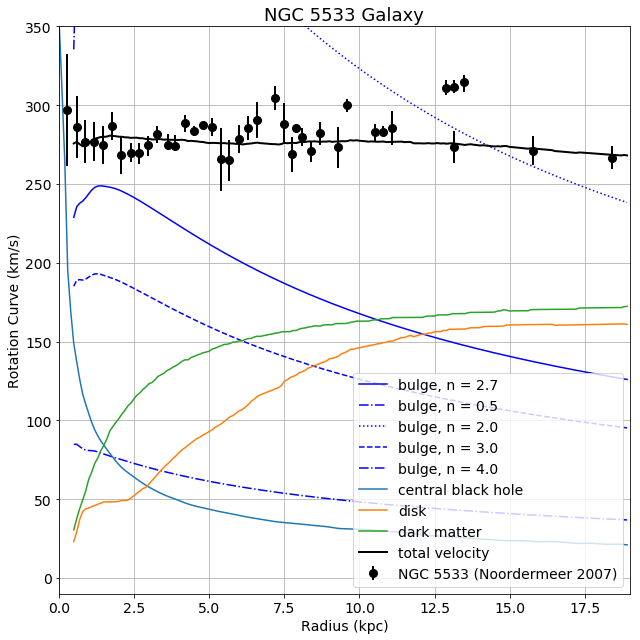

In [9]:
import matplotlib as mpl
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(9.0,9.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')


xmax=19
x = np.arange(0,xmax,0.1)
xb = np.arange(0.5,xmax,0.1)
 #functions
    
plt.errorbar(r_dat,v_dat,yerr=[v_err0,v_err1], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='NGC 5533 (Noordermeer 2007)', linewidth=2)
    
plt.plot(xb, f_v_b_v2_7(xb), linestyle='solid', color='b', label='bulge, n = 2.7') 
plt.plot(xb, f_v_b_v0_5(xb), linestyle='dashdot', color='b', label='bulge, n = 0.5') 
plt.plot(xb, f_v_b_v2(xb), linestyle=':', color='b', label='bulge, n = 2.0') 
plt.plot(xb, f_v_b_v3(xb), linestyle='--', color='b', label='bulge, n = 3.0') 
plt.plot(xb, f_v_b_v4(xb), linestyle='dashdot', color='b', label='bulge, n = 4.0') 

plt.plot(x, f_v_bh_v(x), linestyle='solid', label='central black hole')
plt.plot(xb, f_v_d_v(xb), linestyle='solid', label='disk')
plt.plot(xb, f_v_dm_v(xb), linestyle='solid', label='dark matter')
plt.plot(xb, f_tot_v(xb), color='k', linewidth=2, linestyle='solid', label='total velocity')

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
ax3.set_ylim(-10,350)
ax3.set_xlim(0,xmax)
ax3.set_title('NGC 5533 Galaxy', fontsize=18)              #labeling axes
ax3.set_xlabel('Radius (kpc)', fontsize=14)
ax3.set_ylabel('Rotation Curve (km/s)', fontsize=14)
ax3.xaxis.set_tick_params(labelsize=14)
ax3.yaxis.set_tick_params(labelsize=14);

plt.legend(loc=4,fontsize=14);                                   #adding legend
plt.tight_layout()
plt.savefig('Bulge_Velocity.eps')
plt.show()